In [2]:
import pandas as pd

df = pd.read_csv("../data/raw/MachineLearningRating_v3.txt", sep='|')
df.head()
df.info()
df.describe()

/tmp/ipykernel_21763/1374087701.py:3: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/raw/MachineLearningRating_v3.txt", sep='|')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

,UnderwrittenCoverID,PolicyID,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CustomValueEstimate,NumberOfVehiclesInFleet,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1.000098e+06,9.995460e+05,1.000098e+06,999546.000000,999546.000000,999546.000000,999546.000000,2.204560e+05,0.0,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,1.048175e+05,7.956682e+03,3.020601e+03,5.487770e+07,2.010225e+03,4.046642,2466.743258,97.207919,4.019250,2.255311e+05,NaN,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01
std,6.329371e+04,5.290039e+03,2.649854e+03,1.360381e+07,3.261391e+00,0.294020,442.800640,19.393256,0.468314,5.645157e+05,NaN,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03
min,1.000000e+00,1.400000e+01,1.000000e+00,4.041200e+06,1.987000e+03,0.000000,0.000000,0.000000,0.000000,2.000000e+04,NaN,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,5.514300e+04,4.500000e+03,8.270000e+02,6.005692e+07,2.008000e+03,4.000000,2237.000000,75.000000,4.000000,1.350000e+05,NaN,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,9.408300e+04,7.071000e+03,2.000000e+03,6.005842e+07,2.011000e+03,4.000000,2694.000000,111.000000,4.000000,2.200000e+05,NaN,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,1.391900e+05,1.107700e+04,4.180000e+03,6.005842e+07,2.013000e+03,4.000000,2694.000000,111.000000,4.000000,2.800000e+05,NaN,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,3.011750e+05,2.324600e+04,9.870000e+03,6.506535e+07,2.015000e+03,10.000000,12880.000000,309.000000,6.000000,2.655000e+07,NaN,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05


In [3]:
df[['TotalPremium', 'TotalClaims', 'CustomValueEstimate']].describe()

,TotalPremium,TotalClaims,CustomValueEstimate
count,1.000098e+06,1.000098e+06,2.204560e+05
mean,6.190550e+01,6.486119e+01,2.255311e+05
std,2.302845e+02,2.384075e+03,5.645157e+05
min,-7.825768e+02,-1.200241e+04,2.000000e+04
25%,0.000000e+00,0.000000e+00,1.350000e+05
50%,2.178333e+00,0.000000e+00,2.200000e+05
75%,2.192982e+01,0.000000e+00,2.800000e+05
max,6.528260e+04,3.930921e+05,2.655000e+07


In [4]:
df.isnull().sum().sort_values(ascending=False)

NumberOfVehiclesInFleet     1000098
CrossBorder                  999400
CustomValueEstimate          779642
Rebuilt                      641901
Converted                    641901
WrittenOff                   641901
NewVehicle                   153295
Bank                         145961
AccountType                   40232
Gender                         9536
MaritalStatus                  8259
NumberOfDoors                   552
VehicleType                     552
kilowatts                       552
cubiccapacity                   552
Cylinders                       552
Model                           552
make                            552
VehicleIntroDate                552
bodytype                        552
mmcode                          552
CapitalOutstanding                2
TermFrequency                     0
CalculatedPremiumPerTerm          0
ExcessSelected                    0
CoverCategory                     0
CoverType                         0
CoverGroup                  

In [5]:
high_missing = [
    'NumberOfVehiclesInFleet', 'CrossBorder', 'CustomValueEstimate',
    'Rebuilt', 'Converted', 'WrittenOff'
]
df.drop(columns=high_missing, inplace=True)

In [6]:
# Impute with most frequent value
categorical_cols = ['NewVehicle', 'Bank', 'AccountType', 'Gender', 'MaritalStatus']
for col in categorical_cols:
    mode_val = df[col].mode().iloc[0]
    df[col].fillna(mode_val, inplace=True)

/tmp/ipykernel_21763/1547373973.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_val, inplace=True)


In [7]:
# Impute missing with median

# Step 1: Clean the column by replacing ',' with '' and '.' if needed
df['CapitalOutstanding'] = (
    df['CapitalOutstanding']
    .astype(str)                             # Ensure all entries are strings
    .str.replace(',', '', regex=False)      # Remove commas (thousands separator)
    .str.replace(' ', '', regex=False)      # Remove any stray spaces
)

# Step 2: Convert to float
df['CapitalOutstanding'] = pd.to_numeric(df['CapitalOutstanding'], errors='coerce')

# Step 3: Impute missing with median
df['CapitalOutstanding'].fillna(df['CapitalOutstanding'].median(), inplace=True)

/tmp/ipykernel_21763/4021783302.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CapitalOutstanding'].fillna(df['CapitalOutstanding'].median(), inplace=True)


In [8]:
vehicle_cols = [
    'NumberOfDoors', 'VehicleType', 'kilowatts', 'cubiccapacity', 'Cylinders',
    'Model', 'make', 'VehicleIntroDate', 'bodytype', 'mmcode'
]

for col in vehicle_cols:
    if df[col].dtype == 'object':
        df[col].fillna('Unknown', inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

/tmp/ipykernel_21763/2926429664.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipykernel_21763/2926429664.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [9]:
print("Remaining null values:")
print(df.isnull().sum().sort_values(ascending=False).head(10))

Remaining null values:
UnderwrittenCoverID    0
TermFrequency          0
kilowatts              0
bodytype               0
NumberOfDoors          0
VehicleIntroDate       0
AlarmImmobiliser       0
TrackingDevice         0
CapitalOutstanding     0
NewVehicle             0
dtype: int64


In [10]:
# 1. Show datatype of each column
print("Column data types:")
print(df.dtypes)

Column data types:
UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfD

In [11]:
# Fix TransactionMonth to datetime
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')

# Fix PostalCode to string
df['PostalCode'] = df['PostalCode'].astype(str)

In [12]:
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)

Index(['Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType',
       'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode',
       'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'VehicleType', 'make',
       'Model', 'bodytype', 'VehicleIntroDate', 'AlarmImmobiliser',
       'TrackingDevice', 'NewVehicle', 'TermFrequency', 'ExcessSelected',
       'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product',
       'StatutoryClass', 'StatutoryRiskType'],
      dtype='object')


In [13]:
df.to_csv('../data/processed/preprocessed.csv', index=False)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up visualization aesthetics
sns.set_theme(style="whitegrid", palette="pastel")
%matplotlib inline


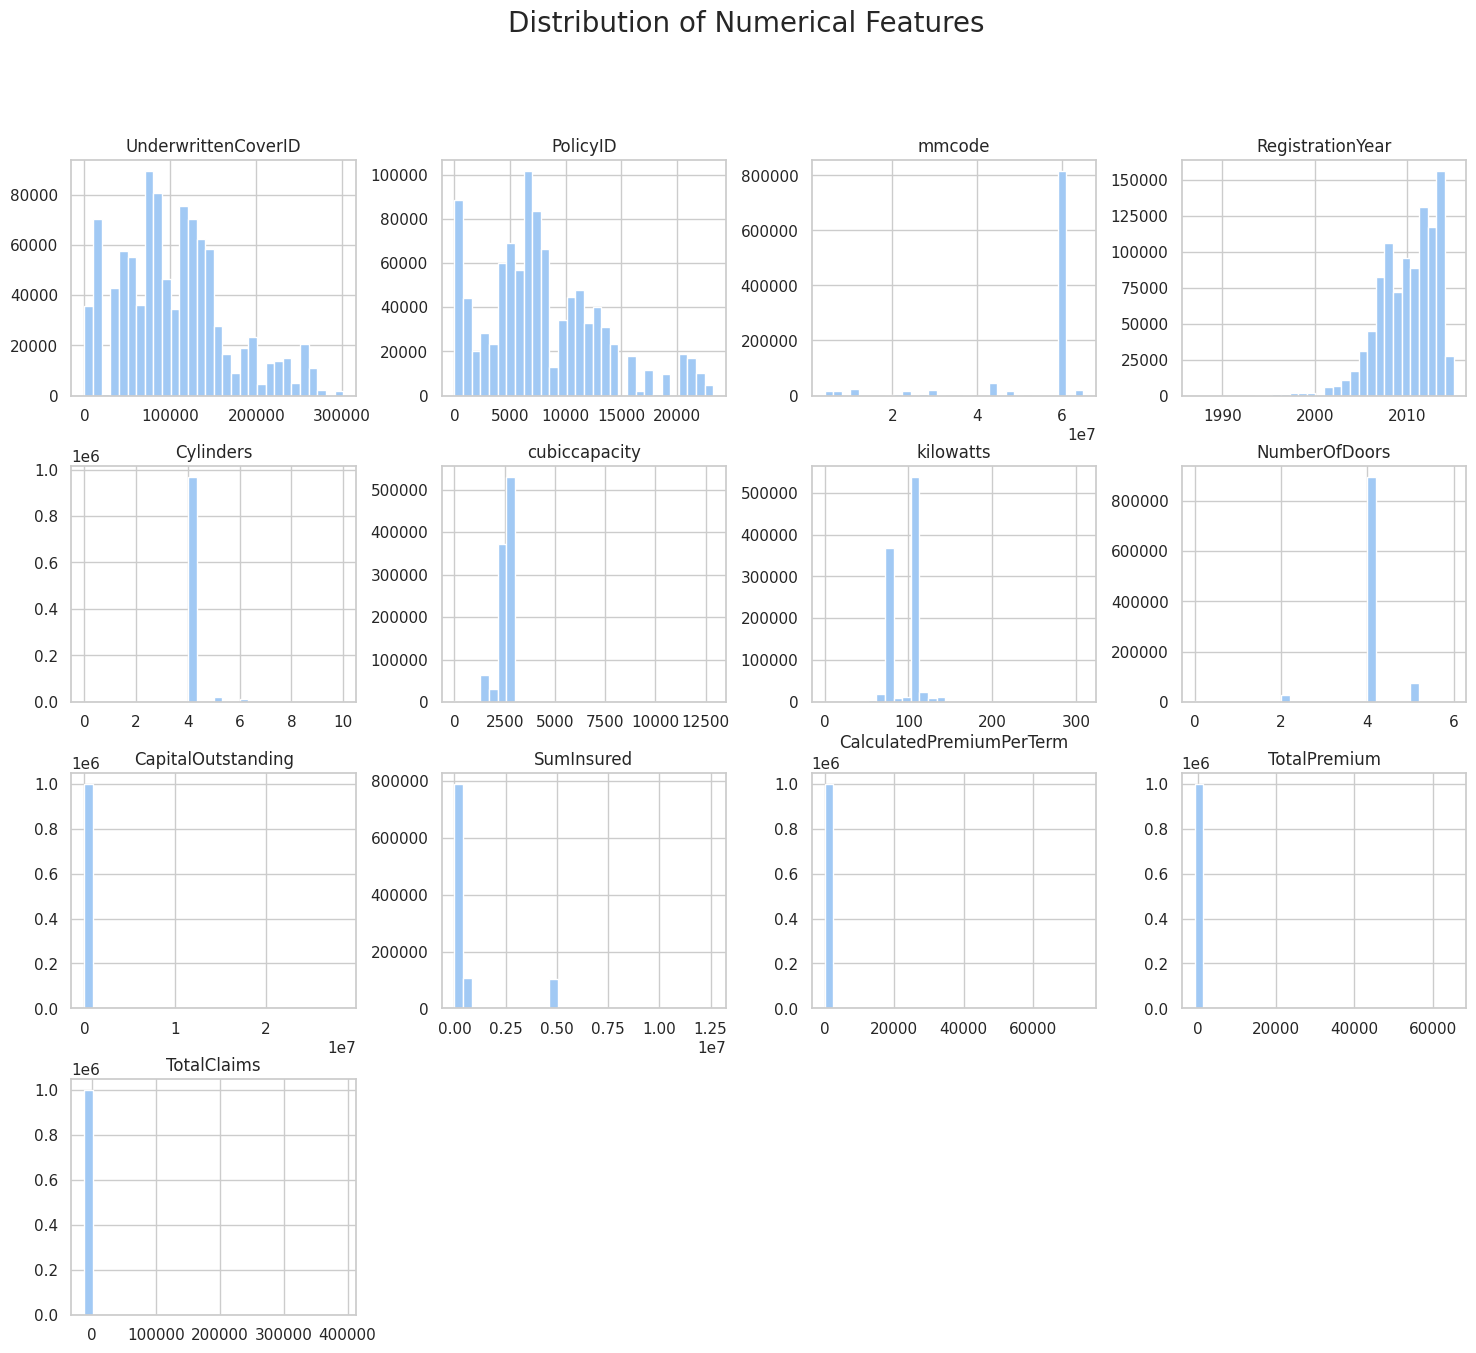

In [14]:
#Numerical Variables
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[numerical_cols].hist(figsize=(18, 15), bins=30)
plt.suptitle('Distribution of Numerical Features', fontsize=20)
plt.show()

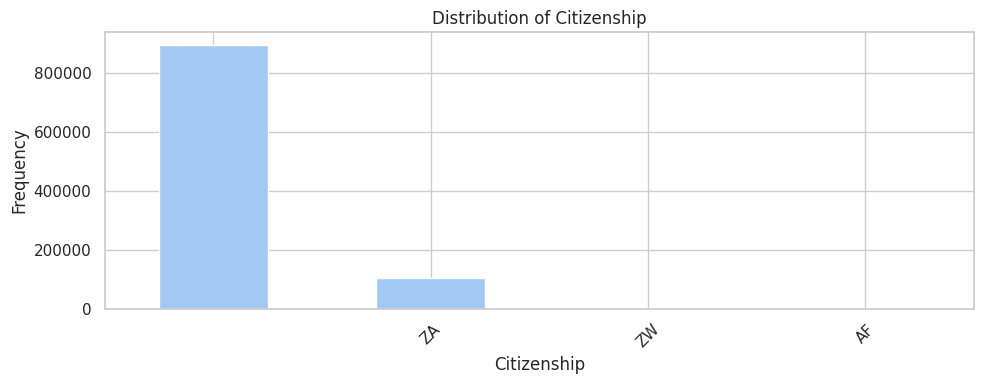

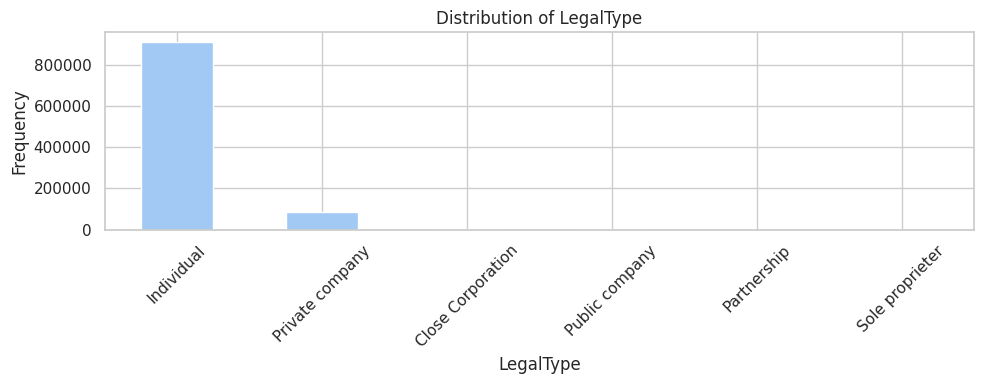

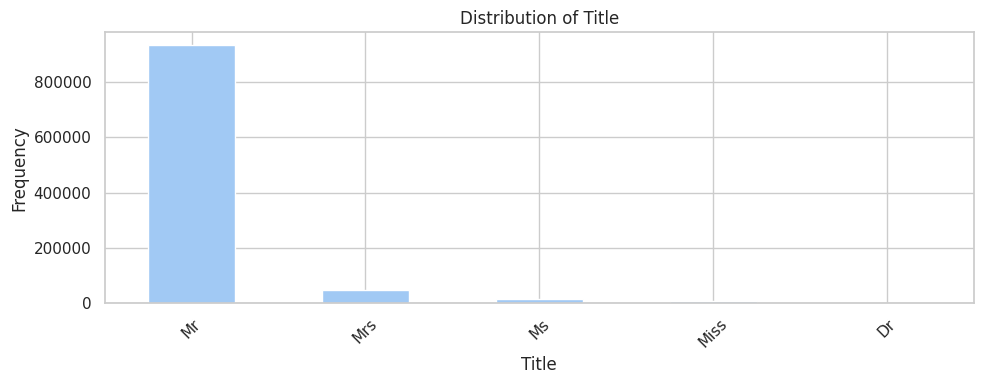

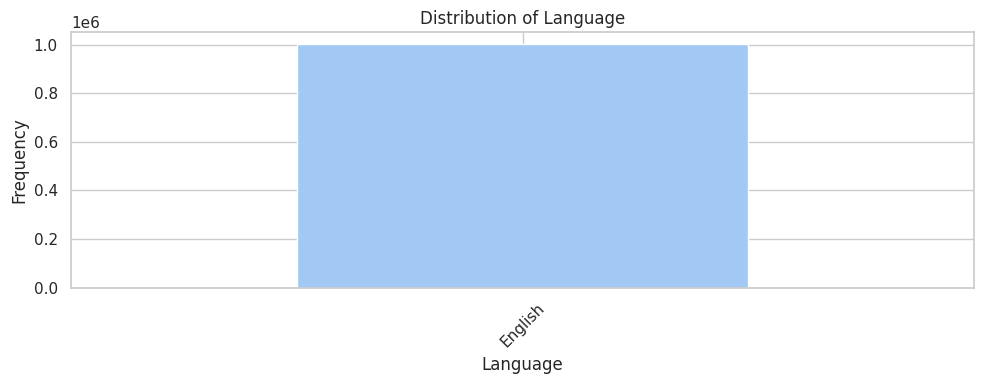

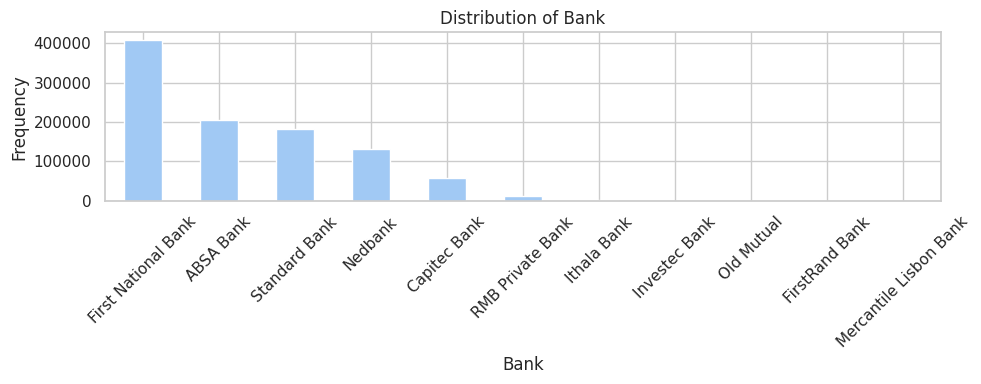

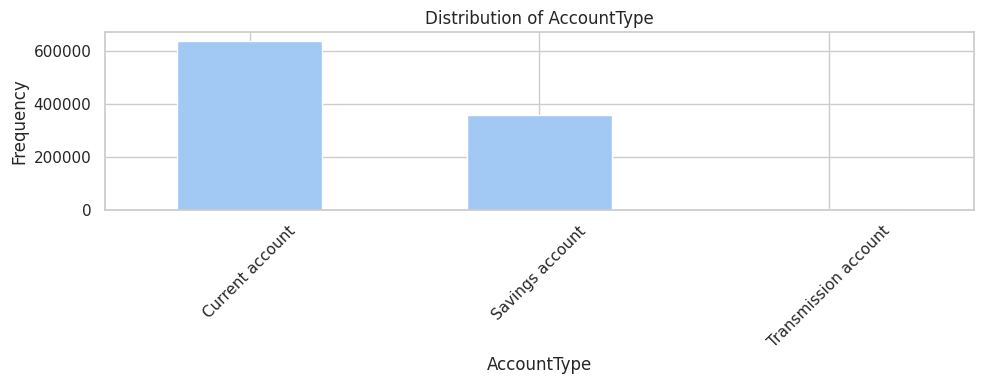

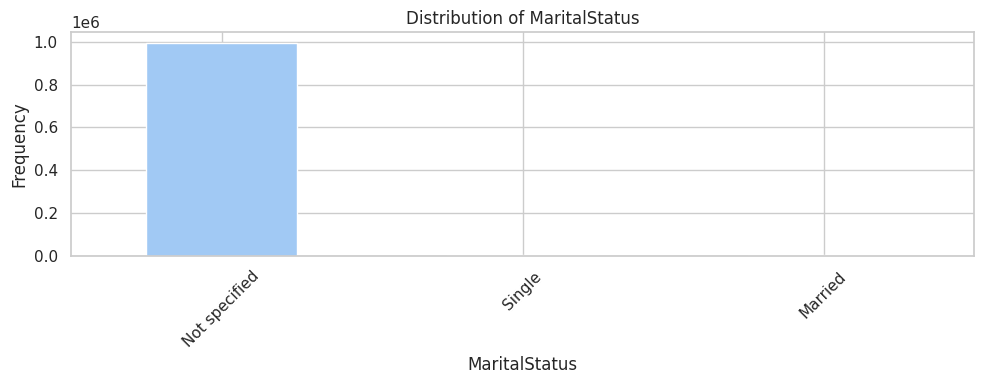

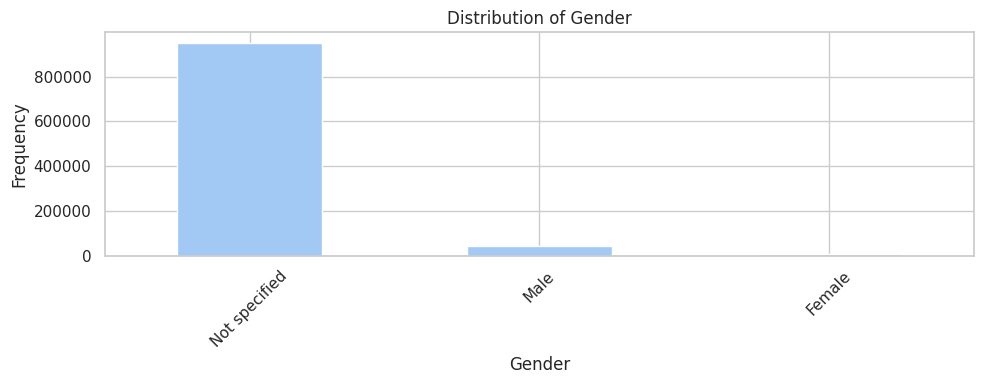

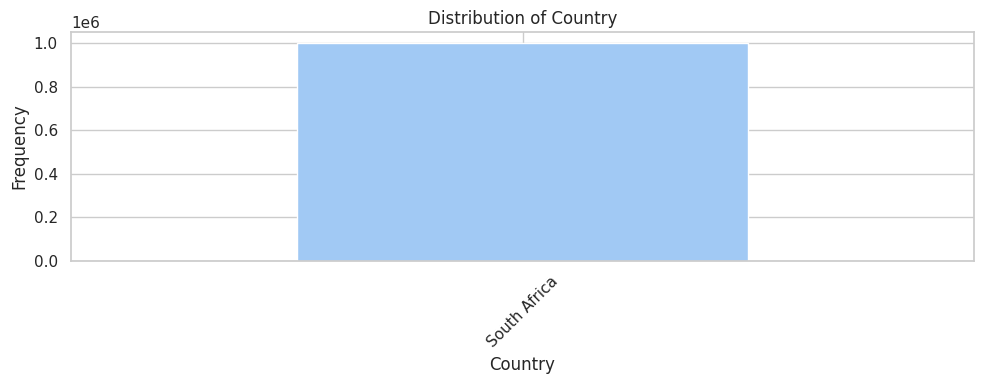

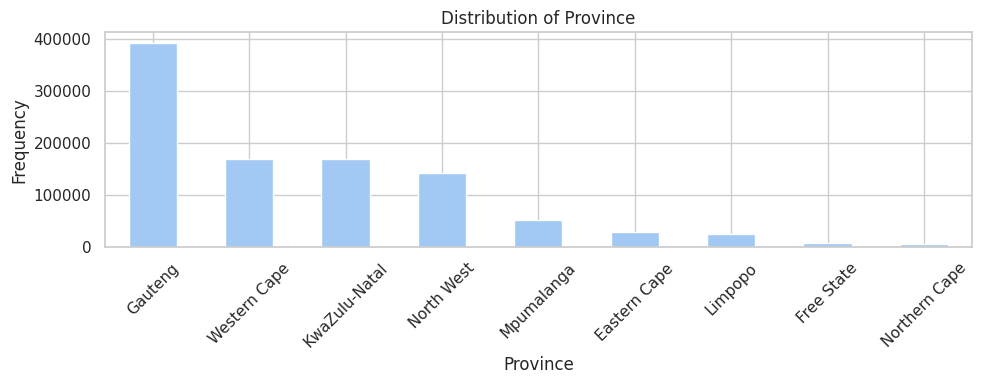

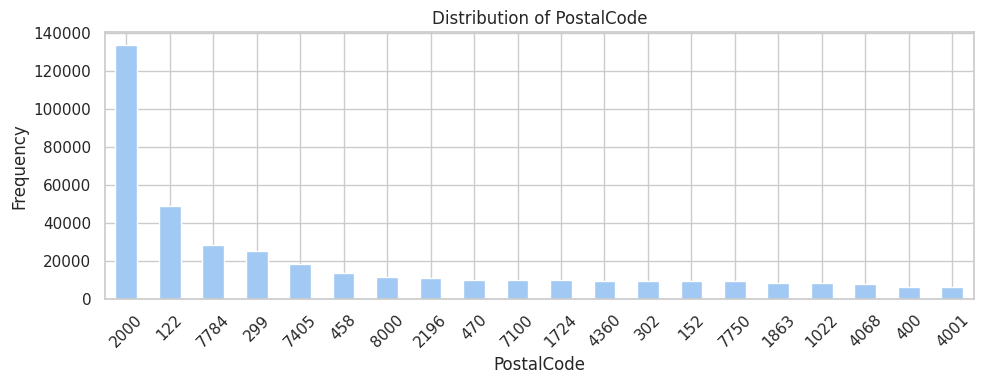

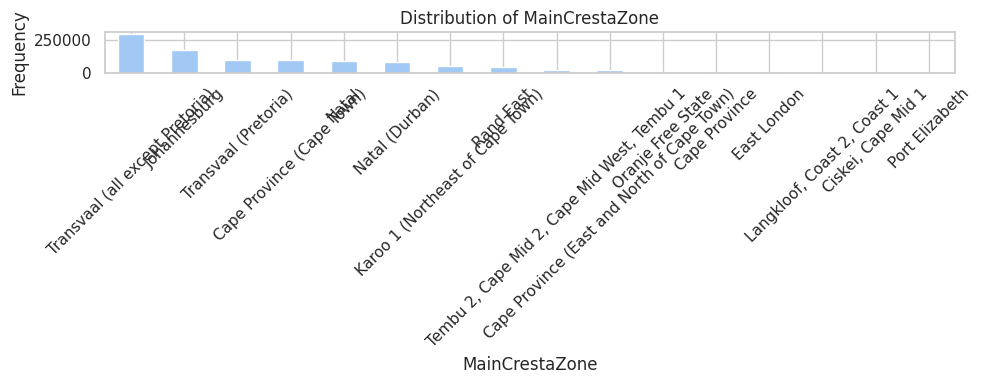

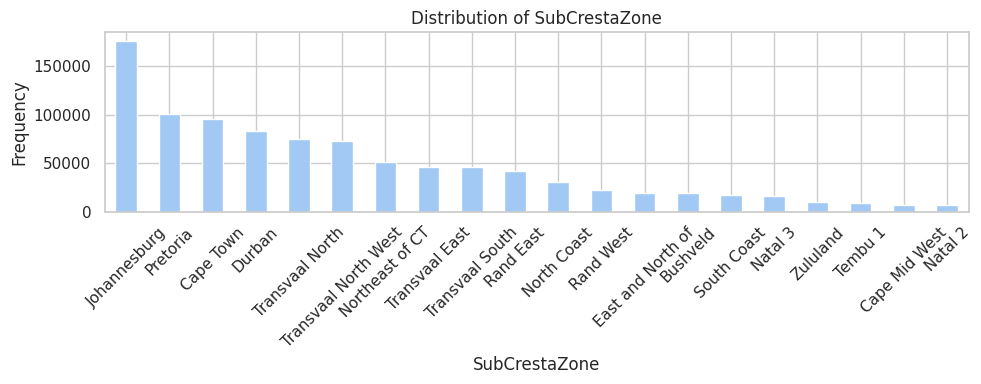

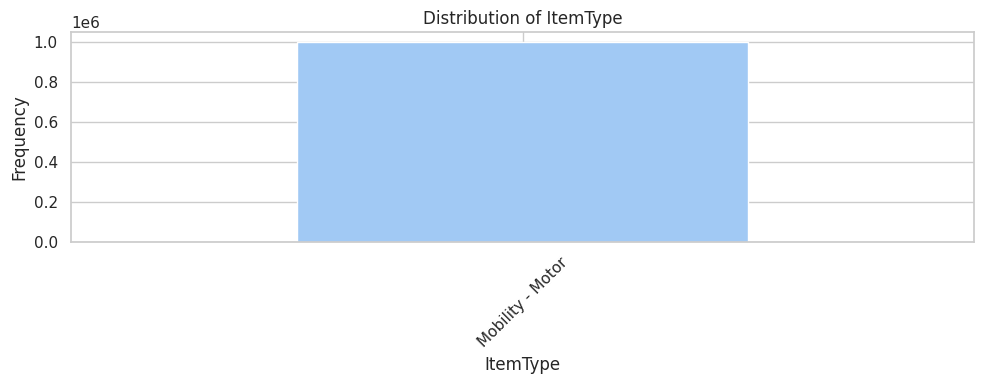

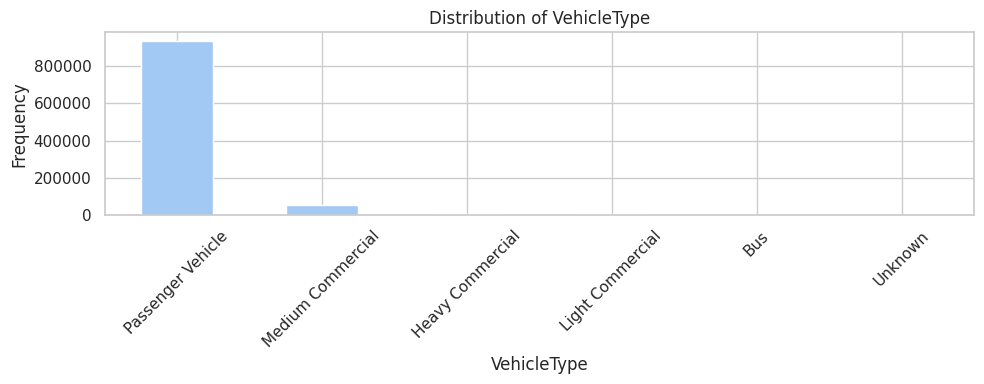

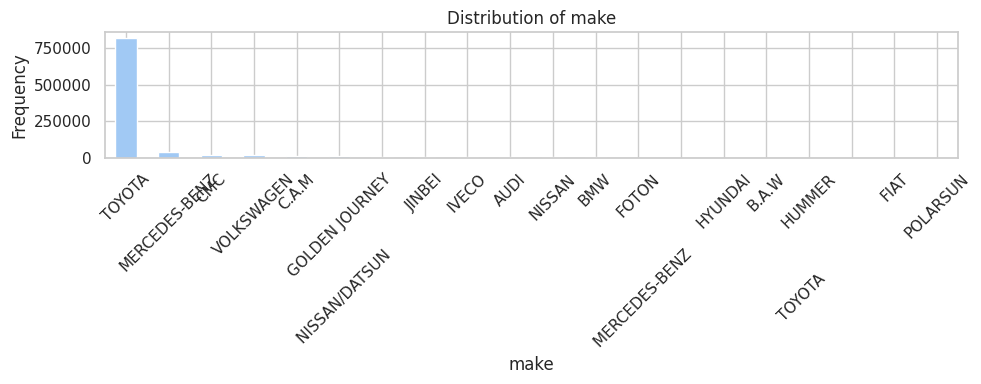

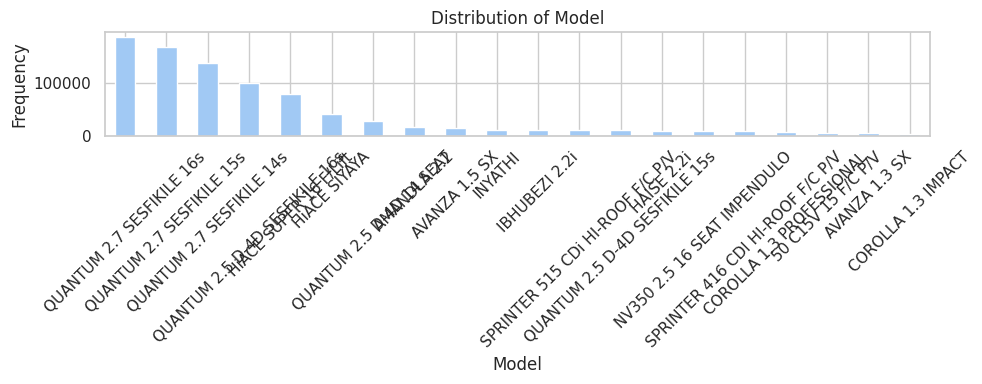

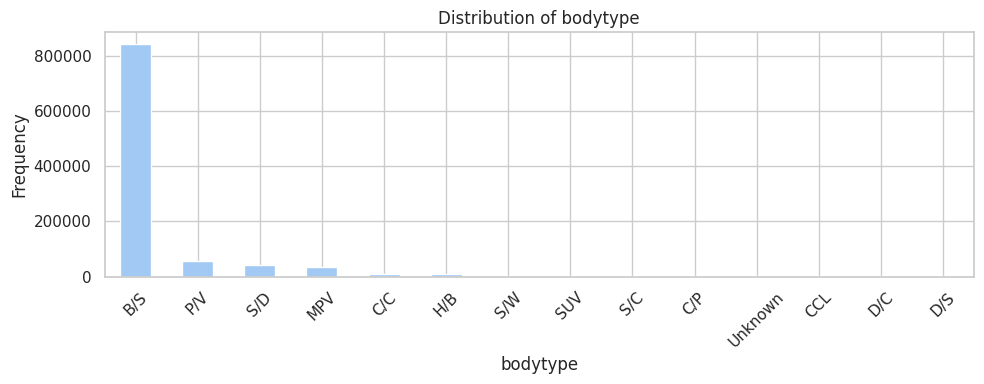

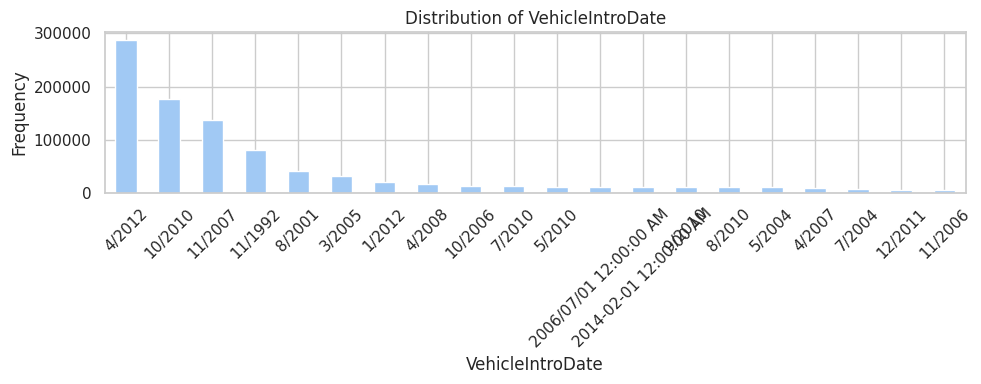

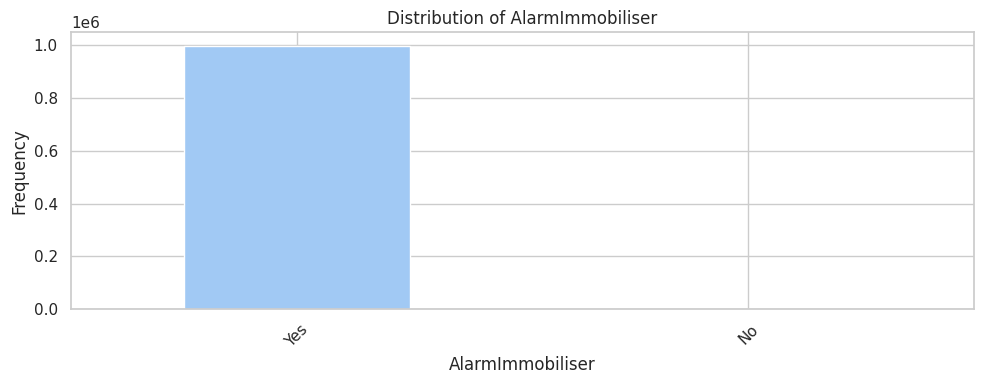

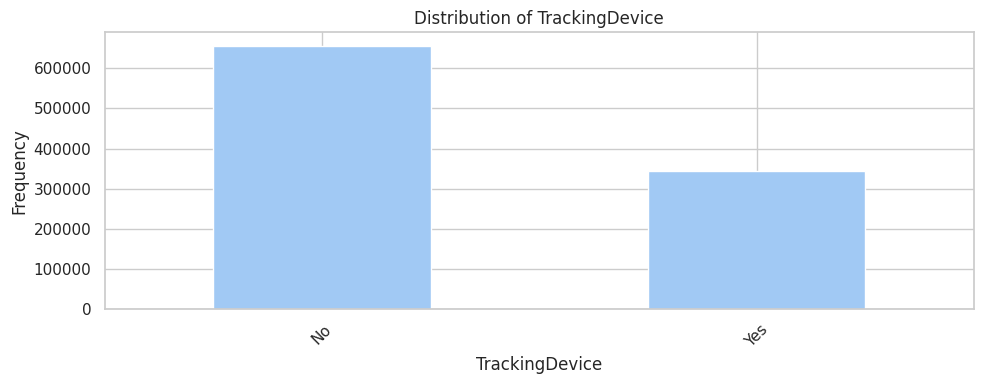

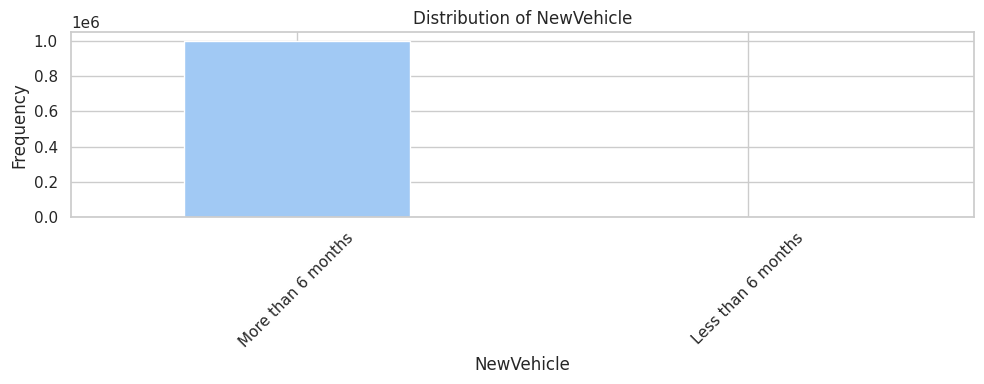

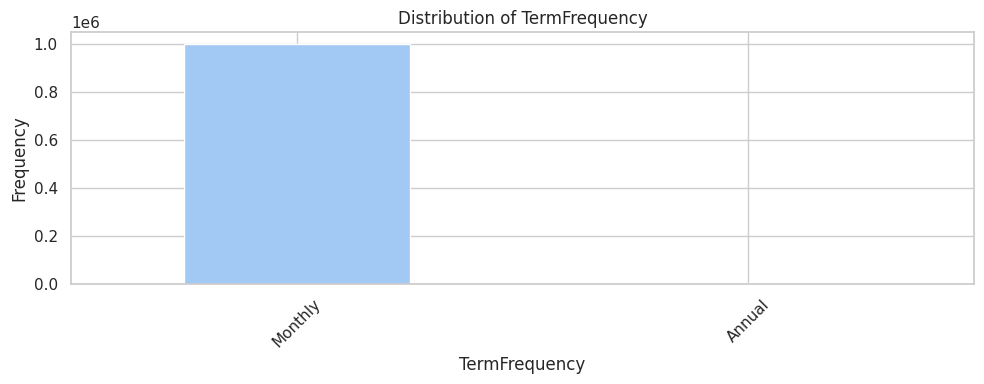

/tmp/ipykernel_21763/2294672461.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


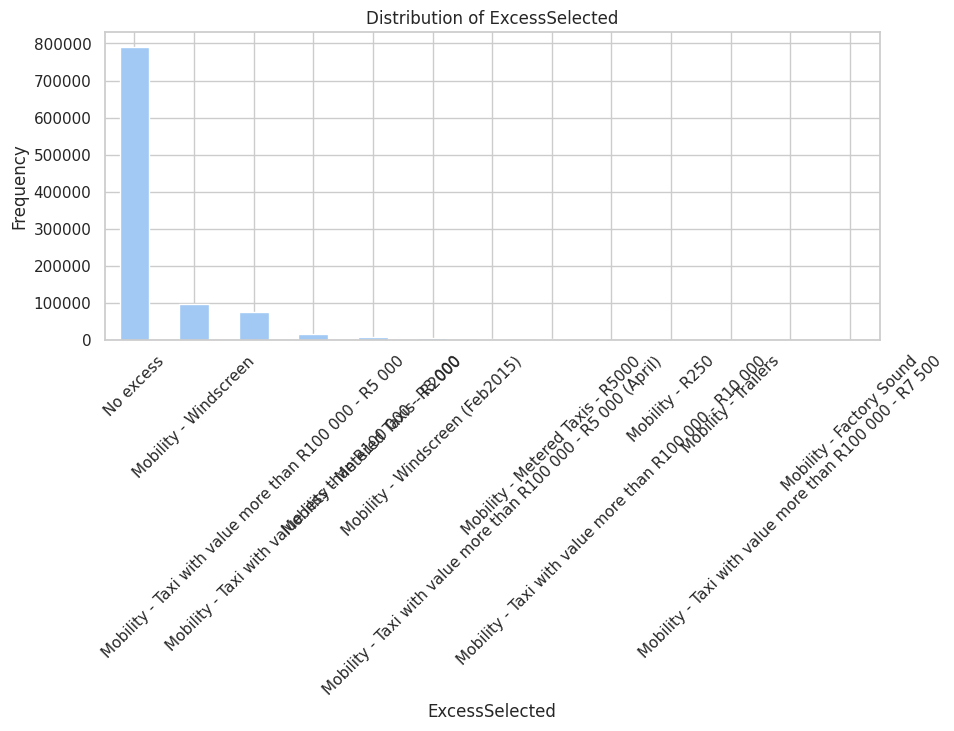

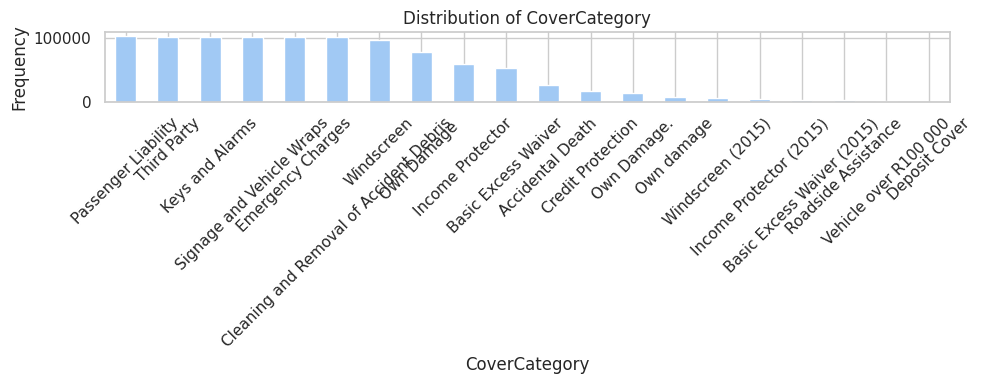

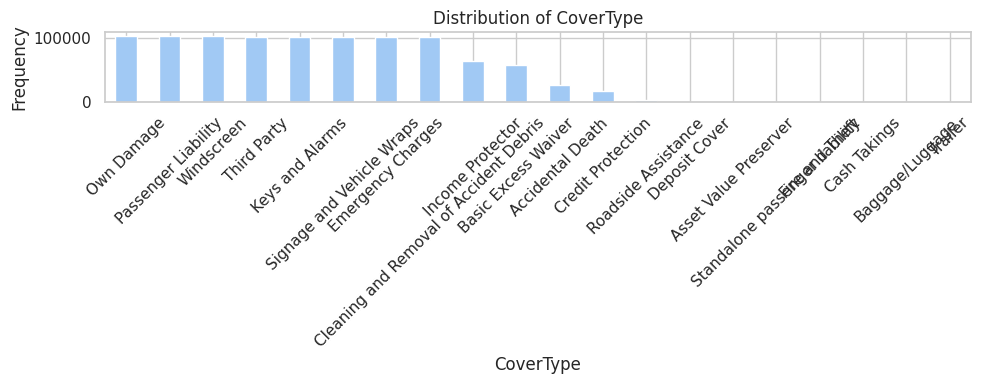

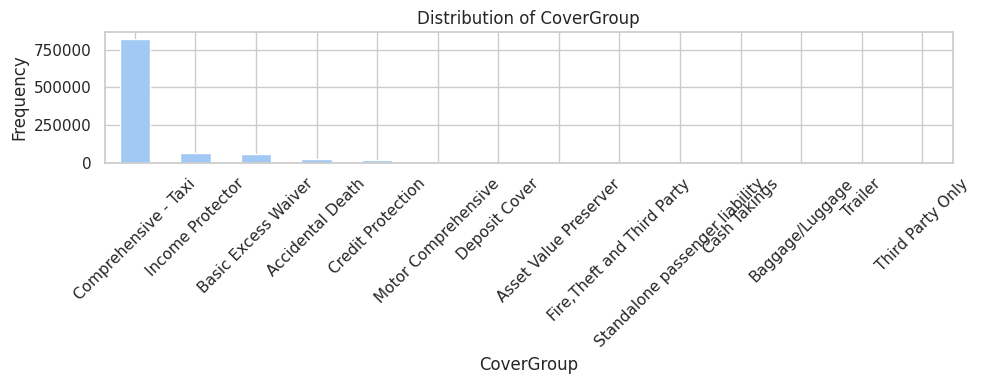

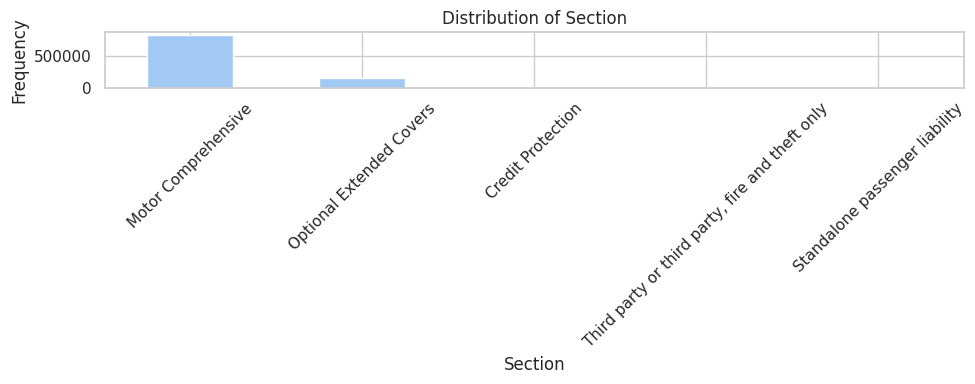

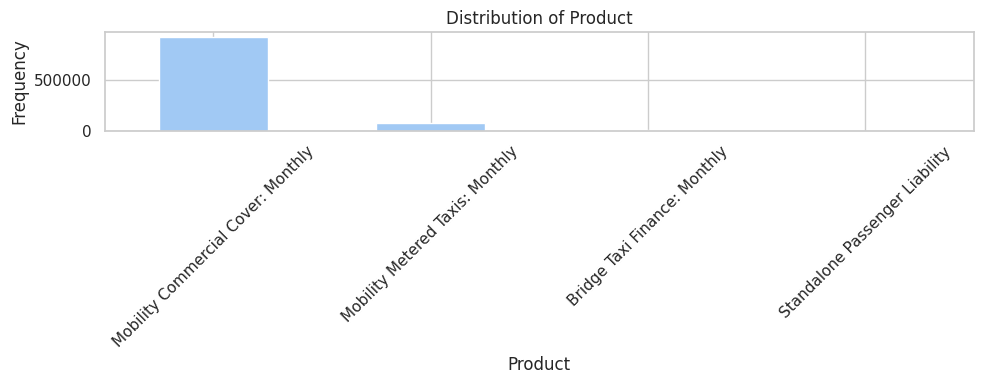

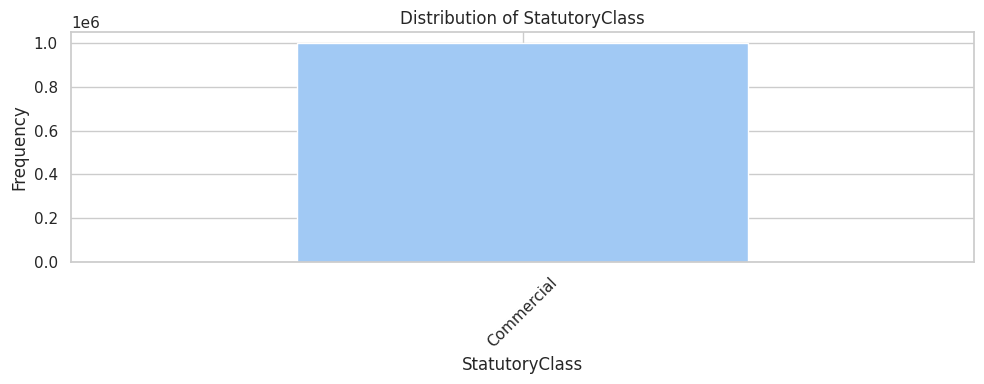

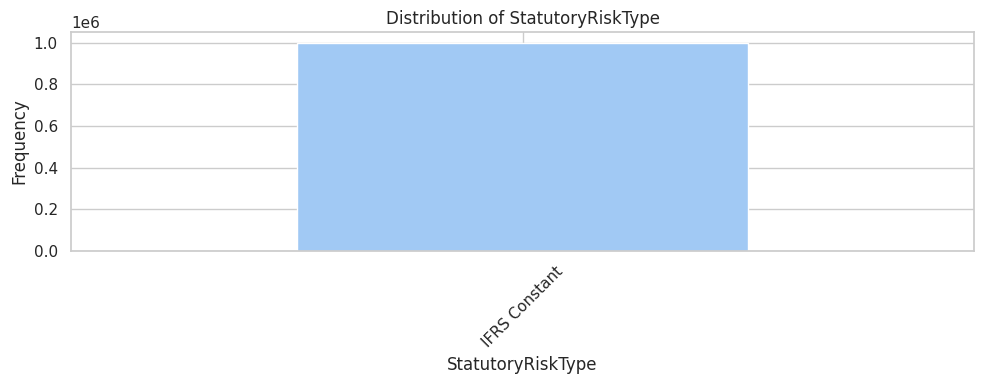

In [15]:
#Categorical Variables
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    df[col].value_counts().sort_values(ascending=False).head(20).plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

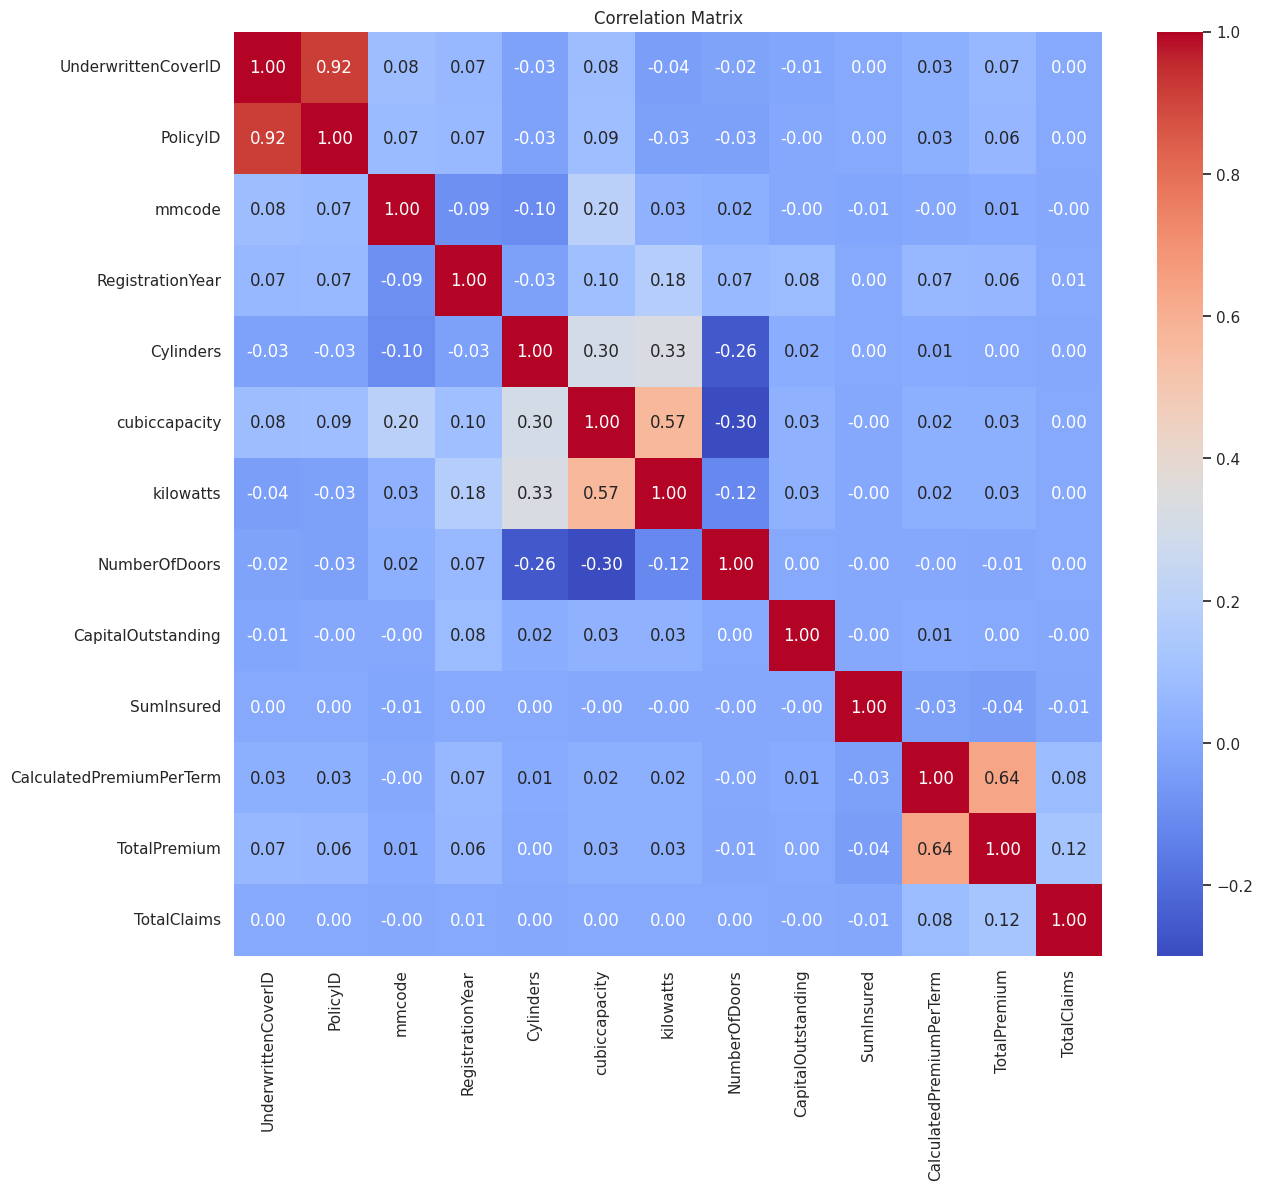

In [17]:
#Correlation Matrix for Numerical Variables
plt.figure(figsize=(14, 12))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


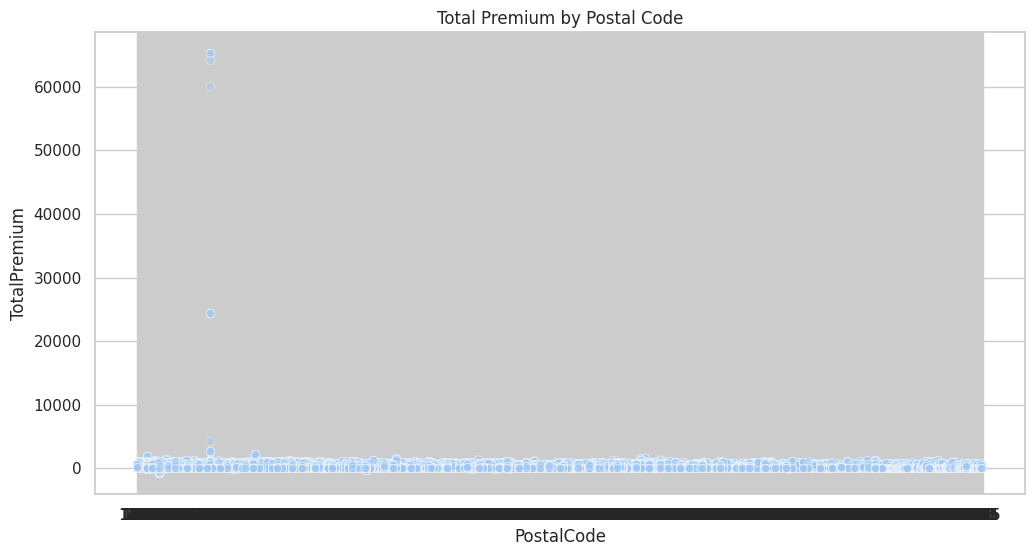

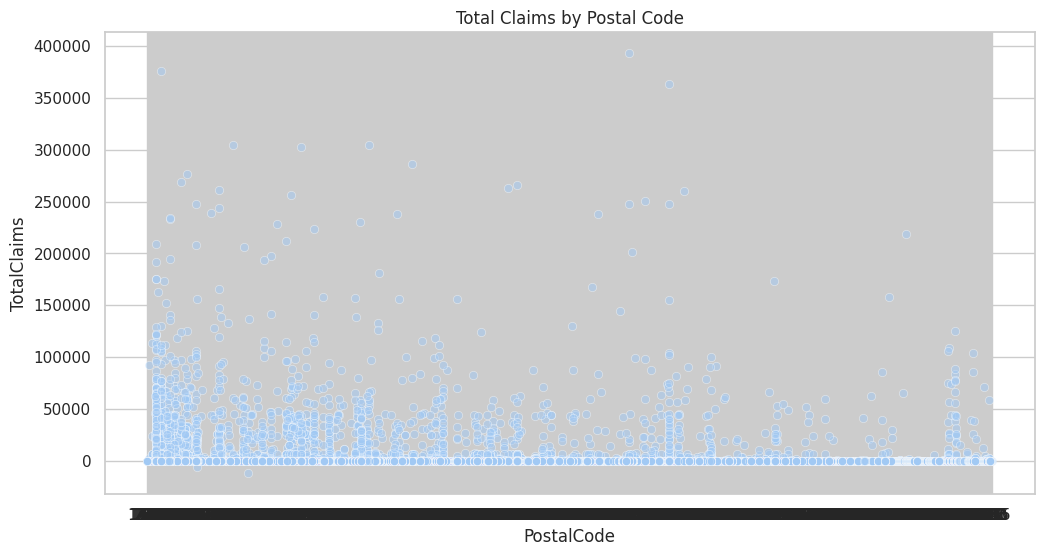

In [18]:
# Monthly Trends (TotalPremium and TotalClaims by ZipCode)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='PostalCode', y='TotalPremium', alpha=0.5)
plt.title("Total Premium by Postal Code")
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='PostalCode', y='TotalClaims', alpha=0.5)
plt.title("Total Claims by Postal Code")
plt.show()


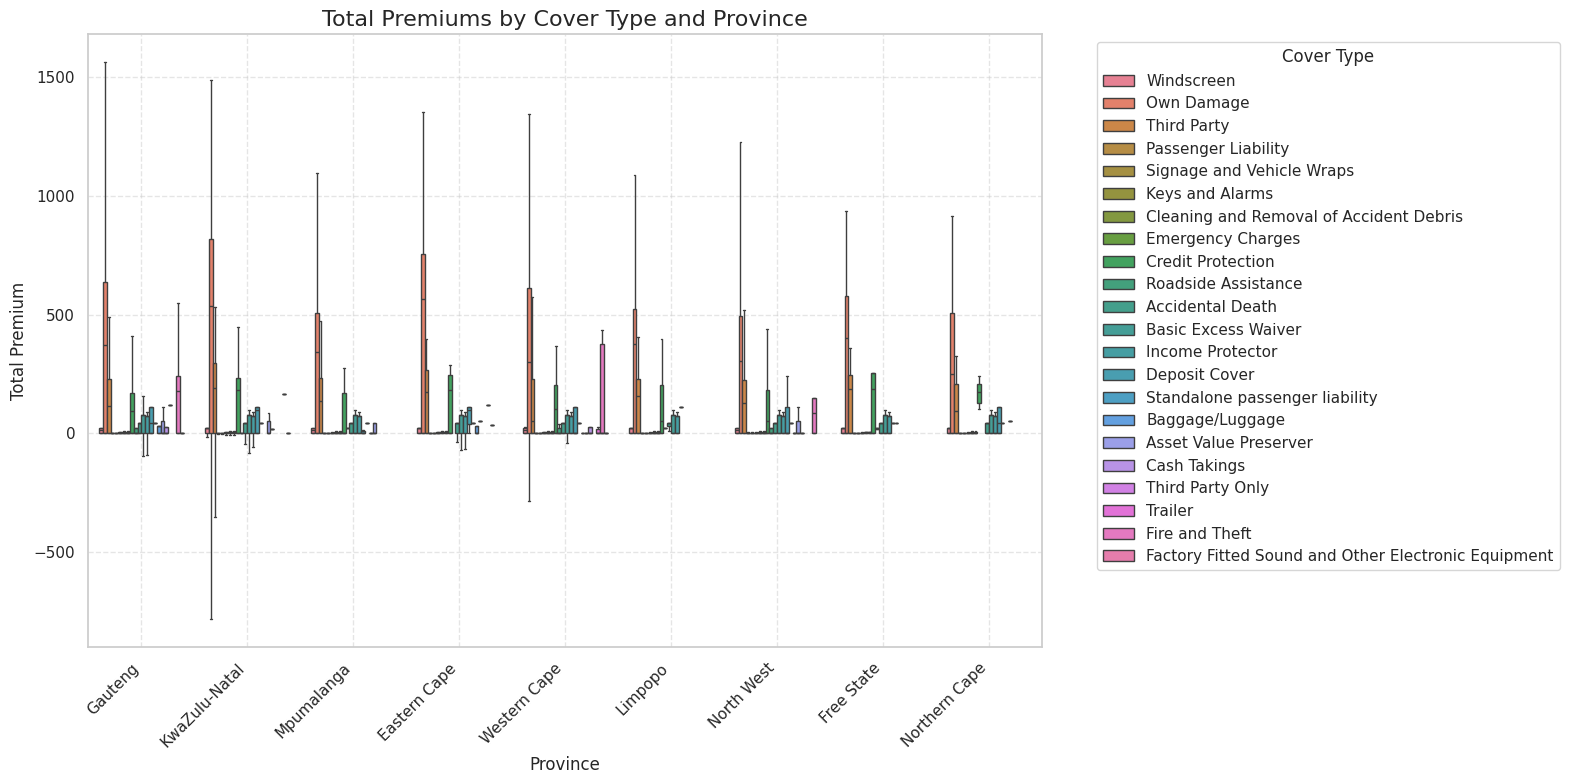

In [21]:
# Compare Cover Type and Premium by Province
plt.figure(figsize=(16, 8))  # Larger figure for clarity
ax = sns.boxplot(
    data=df,
    x='Province',
    y='TotalPremium',
    hue='CoverType',
    showfliers=False  # Hides extreme outliers for better visual scale
)

plt.title("Total Premiums by Cover Type and Province", fontsize=16)
plt.xlabel("Province", fontsize=12)
plt.ylabel("Total Premium", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Angled labels to avoid overlap
plt.legend(title="Cover Type", bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
plt.tight_layout()  # Ensures everything fits
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()



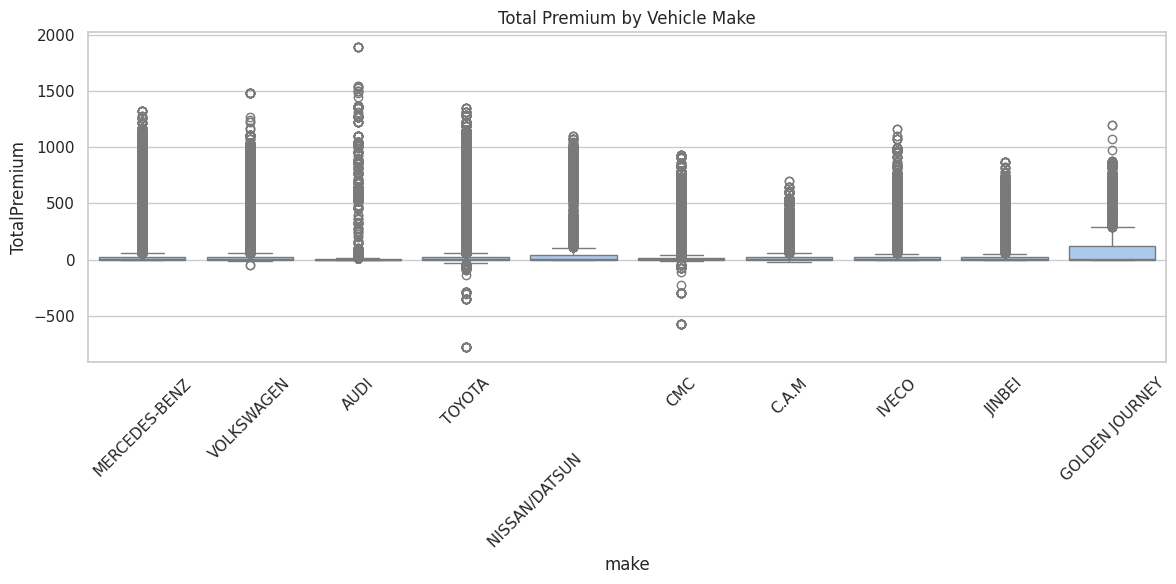

In [23]:
# Auto Make Trends
top_makes = df['make'].value_counts().head(10).index
df_top_makes = df[df['make'].isin(top_makes)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top_makes, x='make', y='TotalPremium')
plt.title("Total Premium by Vehicle Make")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

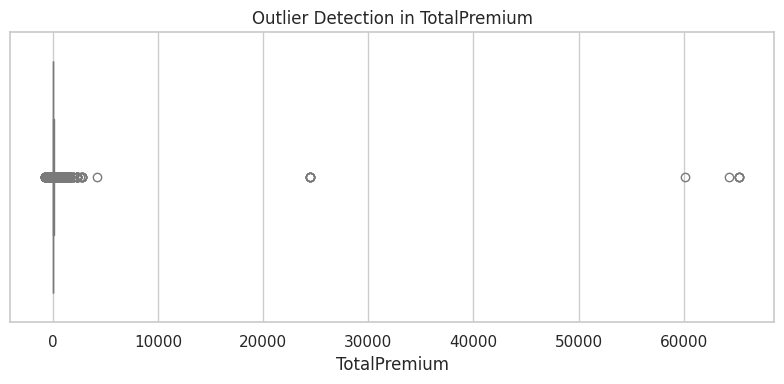

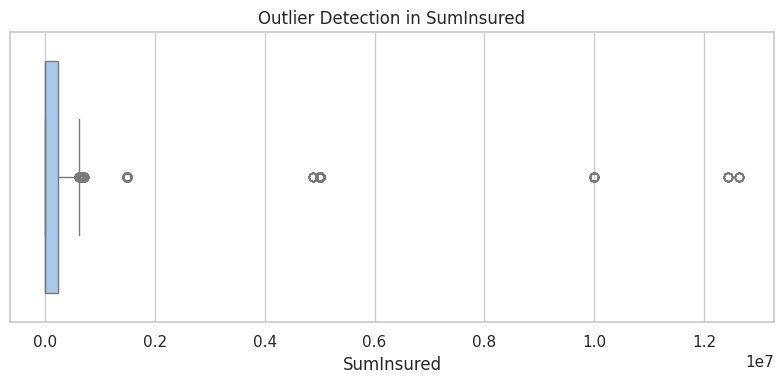

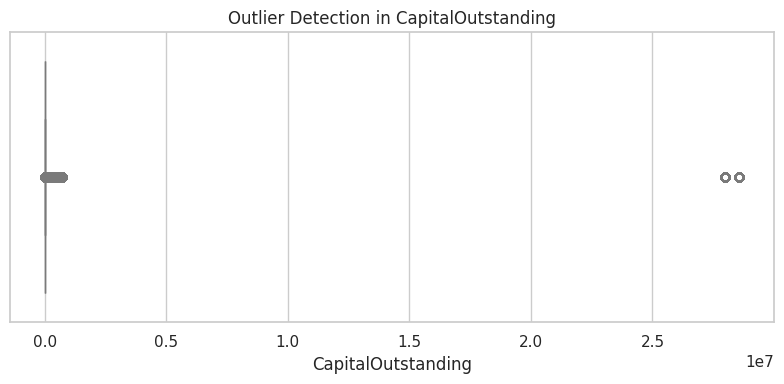

In [24]:
# Outlier Detection with Box Plots
for col in ['TotalPremium', 'SumInsured', 'CapitalOutstanding']:
    if col in df.columns:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[col])
        plt.title(f'Outlier Detection in {col}')
        plt.tight_layout()
        plt.show()

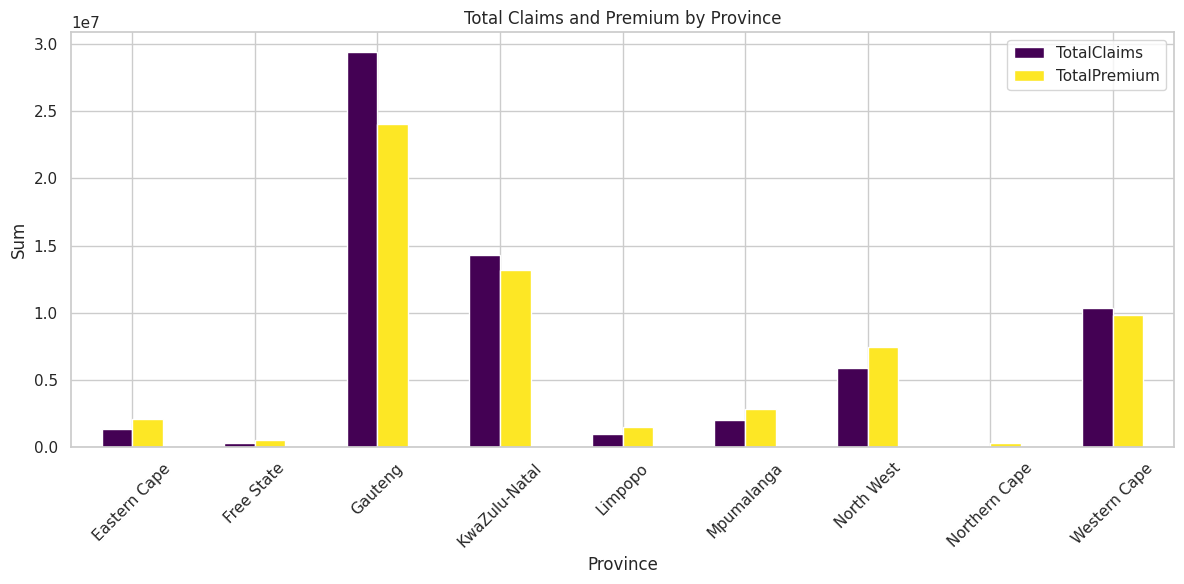

In [25]:
# Heatmap of Claims and Premiums across Provinces
grouped = df.groupby('Province')[['TotalClaims', 'TotalPremium']].sum().reset_index()
grouped.set_index('Province').plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title("Total Claims and Premium by Province")
plt.ylabel("Sum")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/home/sanoy-si/Car-Insurance-Risk-Analytics-and-Predictive-Modeling/venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 90.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sanoy-si/Car-Insurance-Risk-Analytics-and-Predictive-Modeling/venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 27.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sanoy-si/Car-Insurance-Risk-Analytics-and-Predictive-Modeling/venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 90.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sanoy-si/Car-Insurance-Risk-Analytics-and-Predictive-Modeling/venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 68.9% o

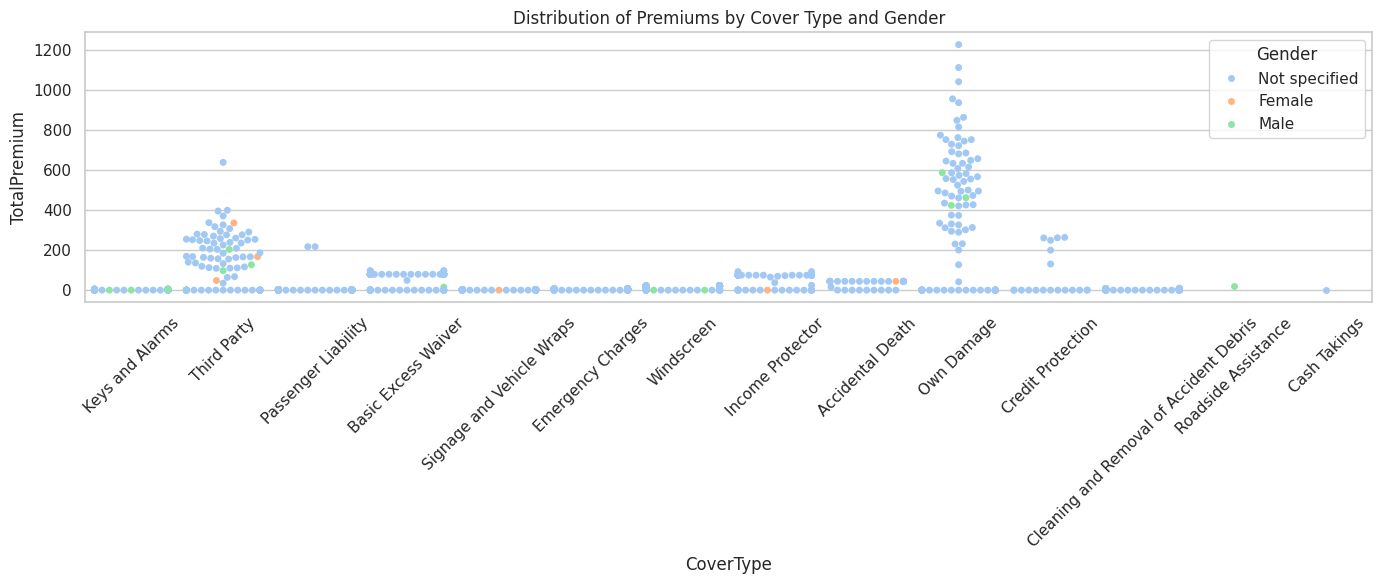

In [27]:
# Swarm Plot of Premiums by Cover Type
plt.figure(figsize=(14, 6))
sns.swarmplot(data=df.sample(1000), x='CoverType', y='TotalPremium', hue='Gender')
plt.title("Distribution of Premiums by Cover Type and Gender")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

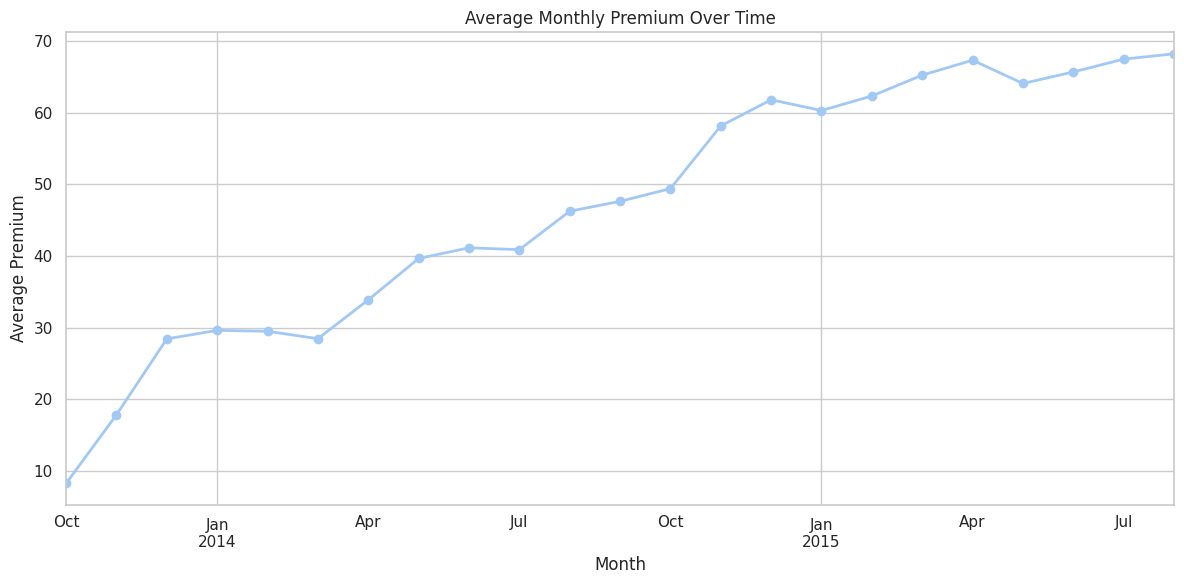

In [29]:
# Trend of Average Premium Over Months
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])

monthly_trend = df.groupby(df['TransactionMonth'].dt.to_period('M'))['TotalPremium'].mean()
monthly_trend.index = monthly_trend.index.to_timestamp()

plt.figure(figsize=(12, 6))
monthly_trend.plot(marker='o', linewidth=2)
plt.title("Average Monthly Premium Over Time")
plt.xlabel("Month")
plt.ylabel("Average Premium")
plt.grid(True)
plt.tight_layout()
plt.show()
